# Setup

## Imports

In [55]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

## Fetch Data

In [41]:
concrete_header = ["Cement", "Slag", "Fly Ash", "Water", "SP", "Coarse Aggr", "Fine Aggr", "SLUMP Flow"]
train_concrete = pd.read_csv("https://raw.githubusercontent.com/DoubekSeth/ToyDatasets/main/concrete/train.csv", names=concrete_header)
test_concrete = pd.read_csv("https://raw.githubusercontent.com/DoubekSeth/ToyDatasets/main/concrete/test.csv", names=concrete_header)

# Algorithm

Method that adds ones to a dataframe, makes algorithm simplier to implement

In [42]:
def addOnesForBiasOnDataset(df):
    rows = df.shape[0]
    columns = df.shape[1]
    ones = np.ones(rows)
    #Need to check if actually need to insert
    if("Bias Term" not in df.columns):
        df.insert(columns-1, "Bias Term", ones, False)

In [43]:
def BatchGD(train_df, gradient_of_cost_func, r, weights, convergence):
    converged = False
    t=0
    costs=[]
    while(not converged):
        grad = gradient_of_cost_func(train_df, weights)
        #print(grad)
        new_weights = weights - r*grad
        if(abs(np.sum(weights-new_weights)) < convergence):
            converged=True
        weights = new_weights
        #Print cost
        cost = cost_MSE_df(weights, train_df)
        t+=1
        print("Cost at step", t, ":", cost)
        costs.append(cost)
    return weights, costs, t

Returns the gradient of the training data with the weights for a MSE cost function

In [44]:
def gradient_Batch_MSE(train_df, weights):
    grad = np.zeros(train_df.shape[1]-1) #Subtract one for the label
    X = train_df.drop("SLUMP Flow", axis=1)
    Y = train_df["SLUMP Flow"]
    for i in range(len(grad)):
        X_i = train_df.iloc[:, i]
        #print("WTX", np.dot(X, weights))
        #print("Y-WTX", Y-np.dot(X, weights))
        #print("X_i", X_i)
        #print("-(Y-WTX)X_i", -np.dot((Y-np.dot(X, weights)), X_i))
        grad[i] = -np.dot((Y-np.dot(X, weights)), X_i)

    return grad

In [126]:
def StochasticGD(train_df, r, weights, convergence):
    converged = False
    t=0
    costs=[]
    while(not converged):
        for index, example in train_df.iterrows():
            new_weights = copy.copy(weights)
            for j in range(len(weights)):
                #print(train_df.iloc[index, train_df.shape[1]-1])
                #print(np.dot(example.drop("SLUMP Flow"), weights))
                #print(train_df.iloc[index, j])
                new_weights[j] = weights[j] + r*(train_df.iloc[index, train_df.shape[1]-1]-np.dot(example.drop("SLUMP Flow"), weights)*train_df.iloc[index, j])
                print("j", train_df.iloc[index, train_df.shape[1]-1]-np.dot(example.drop("SLUMP Flow"), weights)*train_df.iloc[index, j])
            
            if(abs(np.sum(weights-new_weights)) < convergence):
                converged=True
            weights=new_weights
            t+=1
            cost = cost_MSE_df(weights, train_df)
            print("Cost at step", t, ":", cost)
            print(weights)
            costs.append(cost)
    return weights, costs, t

In [46]:
def cost_MSE_df(weights, data):
    X = data.drop("SLUMP Flow", axis=1)
    Y = data["SLUMP Flow"]
    return 0.5*(np.sum(np.square(Y-np.dot(X, weights))))

In [47]:
def cost_MSE(weights, datum):
    return 0.5*(datum["SLUMP Flow"]-np.dot(weights, datum.drop("SLUMP Flow")))

# Accuracy Evaluations

Cost at step 1 : 19.58874240743452
Cost at step 2 : 18.37549931673589
Cost at step 3 : 17.61413080623444
Cost at step 4 : 17.079238729020553
Cost at step 5 : 16.686442849924003
Cost at step 6 : 16.390974333692498
Cost at step 7 : 16.165331412160178
Cost at step 8 : 15.991287094123699
Cost at step 9 : 15.85613226581512
Cost at step 10 : 15.750679160269964
Cost at step 11 : 15.668115081742434
Cost at step 12 : 15.603299378413327
Cost at step 13 : 15.552306286767543
Cost at step 14 : 15.512112814625791
Cost at step 15 : 15.480377423992108
Cost at step 16 : 15.455278650632097
Cost at step 17 : 15.435395047108553
Cost at step 18 : 15.41961458791849
Cost at step 19 : 15.407065607498561
Cost at step 20 : 15.397063761469195
Cost at step 21 : 15.389071067478751
Cost at step 22 : 15.382664139889597
Cost at step 23 : 15.377509472048693
Cost at step 24 : 15.373344150572422
Cost at step 25 : 15.369960774501203
Cost at step 26 : 15.367195640718963
Cost at step 27 : 15.364919473789131
Cost at step 28

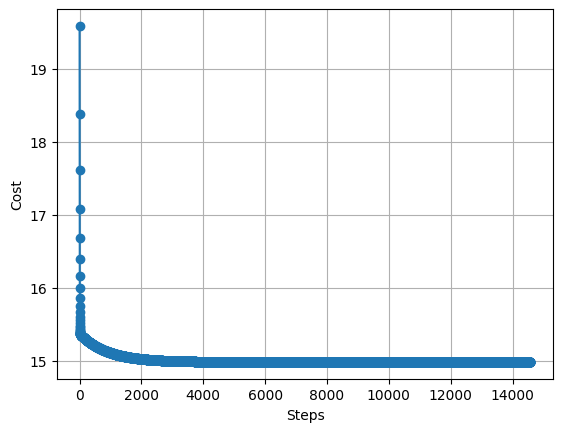

In [49]:
weights = np.zeros(8)
addOnesForBiasOnDataset(train_concrete)
#print(gradient_Batch_MSE(train_concrete, weights))
weights, costs, steps = BatchGD(train_concrete, gradient_Batch_MSE, 0.005, weights, .000001)
plt.plot(np.linspace(1, steps, steps), costs, marker='o', linestyle='-')
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.grid(True)
plt.show
print(weights)

In [50]:
addOnesForBiasOnDataset(test_concrete)
cost_MSE_df(weights, test_concrete)

23.36139498009982

In [124]:
weights = np.zeros(8)
addOnesForBiasOnDataset(train_concrete)
#print(gradient_Batch_MSE(train_concrete, weights))
weights, costs, steps = StochasticGD(train_concrete, 0.02, weights, .00002)
plt.plot(np.linspace(1, steps, steps), costs, marker='o', linestyle='-')
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.grid(True)
plt.show
print(weights)
addOnesForBiasOnDataset(test_concrete)
print(cost_MSE_df(weights, test_concrete))

Cost at step 1 : 22.325704302411392
[-0.00011149 -0.00011149 -0.00011149 -0.00011149 -0.00011149 -0.00011149
 -0.00011149 -0.00011149]
-0.0054799990638968
Cost at step 2 : 22.274841876873925
[0.01126182 0.01126055 0.01125901 0.01126205 0.01126081 0.01126097
 0.01125788 0.01126301]
0.5552629695903062
Cost at step 3 : 22.244762190794933
[0.02679954 0.02781262 0.0267393  0.02634152 0.02726498 0.02776234
 0.02739814 0.02677419]
0.7479469359871815
Cost at step 4 : 22.23704329780293
[0.03933662 0.03792209 0.03765769 0.03550614 0.03757564 0.04032587
 0.03985221 0.03694093]
0.493335878538492
Cost at step 5 : 22.229603499674425
[0.05591478 0.05484011 0.05507724 0.05220962 0.05455103 0.05744874
 0.05777214 0.05321576]
0.7957533158015305
Cost at step 6 : 22.27540254465801
[0.06248626 0.06210632 0.06829802 0.06036383 0.06154389 0.06754497
 0.06615723 0.05992619]
0.3320506380050611
Cost at step 7 : 22.236523298571527
[0.05274779 0.0481544  0.05574703 0.04816439 0.04811326 0.05725317
 0.05554153 0.0

KeyboardInterrupt: 

In [115]:
weights, residuals, rank, s = np.linalg.lstsq(train_concrete.drop("SLUMP Flow", axis=1), train_concrete["SLUMP Flow"])
print(weights)
cost_MSE_df(weights, test_concrete)

[ 0.90056451  0.78629331  0.85104314  1.29889413  0.12989067  1.57224887
  0.99869359 -0.01519667]


C:\Users\doube\AppData\Local\Temp\ipykernel_16584\669012202.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  weights, residuals, rank, s = np.linalg.lstsq(train_concrete.drop("SLUMP Flow", axis=1), train_concrete["SLUMP Flow"])


23.36176447993896

In [127]:
paper_df = pd.DataFrame([[1, -1, 2, 1], [1, 1, 3, 4], [-1, 1, 0, -1], [1, 2, -4, -2], [3, -1, -1, 0]])
paper_df.columns = ["x_1", "x_2", "x_3", "SLUMP Flow"]
addOnesForBiasOnDataset(paper_df)
print(paper_df)

StochasticGD(paper_df, r=0.1, weights=np.zeros(4), convergence=0.001)

   x_1  x_2  x_3  Bias Term  SLUMP Flow
0    1   -1    2        1.0           1
1    1    1    3        1.0           4
2   -1    1    0        1.0          -1
3    1    2   -4        1.0          -2
4    3   -1   -1        1.0           0
j 1.0
j 1.0
j 1.0
j 1.0
Cost at step 1 : 8.649999999999999
[0.1 0.1 0.1 0.1]
j 3.4
j 3.4
j 2.2
j 3.4
Cost at step 2 : 6.0944
[0.44 0.44 0.32 0.44]
j -0.5599999999999999
j -1.44
j -1.0
j -1.44
Cost at step 3 : 6.834512
[0.384 0.296 0.22  0.296]
j -2.392
j -2.784
j -0.43199999999999994
j -2.392
Cost at step 4 : 7.035418239999998
[0.1448 0.0176 0.1768 0.0568]
j -0.8904000000000005
j 0.2968000000000002
j 0.2968000000000002
j -0.2968000000000002
Cost at step 5 : 6.868471801599998
[0.05576 0.04728 0.20648 0.02712]
j 0.5514399999999999
j 1.44856
j 0.10287999999999975
j 0.5514399999999999
Cost at step 6 : 6.693225891456
[0.110904 0.192136 0.216768 0.082264]
j 2.9643919999999997
j 2.9643919999999997
j 0.8931759999999991
j 2.9643919999999997
Cost at step 7 : 6

KeyboardInterrupt: 